In [1]:
pip install seaborn

     |████████████████████████████████| 292 kB 3.4 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
pip install openpyxl

     |████████████████████████████████| 242 kB 4.3 MB/s            
Note: you may need to restart the kernel to use updated packages.


In [4]:
df=pd.read_excel('finaldata.xlsx',engine='openpyxl')

# Feature Engineering

In [5]:
df.head()

,CUSTOMER_NUMBER,DATE_OF_BIRTH,GENDER,STREET_ADDRESS,COUNTRY,CUSTOMER_NAME,SALES_SCHEME_CODE,SALES_STRATEGY_TYPE,MARITAL_STATUS,DAYS_SINCE_CUSTOMER_ENGAGEMENT,...,TOTAL_HOUSEHOLD_ANNUAL_EXPENDITURE,GROCERY_WEEKLY_SPENDING,TOTAL_EXPENDATURE_TO_DATE,NO_ITEMS_PURCHASED,WEEKLY_FUEL_EXPENDATURE,SALES_CALL_STATUS,STORES_VISITED,LOYALTY_CARD_STATUS,LOYALTY_GIFT_SENT,SALE
0,1208538993,1959-06-25,Male,7304 Arizona Place,Philippines,kerr colloby,H1,Supplement,S,16,...,6700,220,67980,2,60,Due,5,Inactive,0,1
1,2994516667,1989-02-25,Male,0551 Mariners Cove Street,Russia,bernardo hartop,F1,Basic,D,33,...,6400,150,19350,5,90,Up-to-Date,7,Active,0,1
2,5694078640,2004-03-13,Male,03 6th Hill,Thailand,agustin pattrick,F1,Supplement,S,15,...,42100,90,11970,3,70,Missed,2,Active,1,0
3,1008558214,1966-02-24,Female,89 Rieder Terrace,Philippines,rubie canto,F1,Urgent,D,18,...,25300,170,32980,3,70,Missed,5,Active,0,1
4,8008647159,2006-01-10,Male,12268 Browning Street,Poland,tobie morrowe,F1,Urgent,D,18,...,47500,50,26800,2,60,Up-to-Date,8,Active,0,1


In [6]:
df.columns

Index(['CUSTOMER_NUMBER', 'DATE_OF_BIRTH', 'GENDER', 'STREET_ADDRESS',
       'COUNTRY', 'CUSTOMER_NAME', 'SALES_SCHEME_CODE', 'SALES_STRATEGY_TYPE',
       'MARITAL_STATUS', 'DAYS_SINCE_CUSTOMER_ENGAGEMENT', 'REG_DATE',
       'START_DATE', 'OCC_CODE', 'TOTAL_HOUSEHOLD_ANNUAL_EXPENDITURE',
       'GROCERY_WEEKLY_SPENDING', 'TOTAL_EXPENDATURE_TO_DATE',
       'NO_ITEMS_PURCHASED', 'WEEKLY_FUEL_EXPENDATURE', 'SALES_CALL_STATUS',
       'STORES_VISITED', 'LOYALTY_CARD_STATUS', 'LOYALTY_GIFT_SENT', 'SALE'],
      dtype='object')

# Dropping customer_number,streetaddress,customer_name as it is not required, as such features are unique for each customers

In [7]:
df.drop(['CUSTOMER_NUMBER','CUSTOMER_NAME','STREET_ADDRESS'],axis=1,inplace=True)

In [8]:
df.head()

,DATE_OF_BIRTH,GENDER,COUNTRY,SALES_SCHEME_CODE,SALES_STRATEGY_TYPE,MARITAL_STATUS,DAYS_SINCE_CUSTOMER_ENGAGEMENT,REG_DATE,START_DATE,OCC_CODE,TOTAL_HOUSEHOLD_ANNUAL_EXPENDITURE,GROCERY_WEEKLY_SPENDING,TOTAL_EXPENDATURE_TO_DATE,NO_ITEMS_PURCHASED,WEEKLY_FUEL_EXPENDATURE,SALES_CALL_STATUS,STORES_VISITED,LOYALTY_CARD_STATUS,LOYALTY_GIFT_SENT,SALE
0,1959-06-25,Male,Philippines,H1,Supplement,S,16,2009-01-24,2009-02-01,M,6700,220,67980,2,60,Due,5,Inactive,0,1
1,1989-02-25,Male,Russia,F1,Basic,D,33,2012-07-03,2012-07-24,SS,6400,150,19350,5,90,Up-to-Date,7,Active,0,1
2,2004-03-13,Male,Thailand,F1,Supplement,S,15,2012-06-21,2012-06-30,S,42100,90,11970,3,70,Missed,2,Active,1,0
3,1966-02-24,Female,Philippines,F1,Urgent,D,18,2011-04-09,2011-04-17,M,25300,170,32980,3,70,Missed,5,Active,0,1
4,2006-01-10,Male,Poland,F1,Urgent,D,18,2004-09-26,2004-10-04,P,47500,50,26800,2,60,Up-to-Date,8,Active,0,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   DATE_OF_BIRTH                       1000 non-null   datetime64[ns]
 1   GENDER                              1000 non-null   object        
 2   COUNTRY                             1000 non-null   object        
 3   SALES_SCHEME_CODE                   1000 non-null   object        
 4   SALES_STRATEGY_TYPE                 1000 non-null   object        
 5   MARITAL_STATUS                      1000 non-null   object        
 6   DAYS_SINCE_CUSTOMER_ENGAGEMENT      1000 non-null   int64         
 7   REG_DATE                            1000 non-null   datetime64[ns]
 8   START_DATE                          1000 non-null   datetime64[ns]
 9   OCC_CODE                            1000 non-null   object        
 10  TOTAL_HOUSEHOLD_ANNUAL_EX

In [24]:
for i in df.columns:
    
    
    
    print(i,len(df[i].unique())<15)

DATE_OF_BIRTH False
GENDER True
COUNTRY False
SALES_SCHEME_CODE True
SALES_STRATEGY_TYPE True
MARITAL_STATUS True
DAYS_SINCE_CUSTOMER_ENGAGEMENT False
REG_DATE False
START_DATE False
OCC_CODE True
TOTAL_HOUSEHOLD_ANNUAL_EXPENDITURE False
GROCERY_WEEKLY_SPENDING False
TOTAL_EXPENDATURE_TO_DATE False
NO_ITEMS_PURCHASED True
WEEKLY_FUEL_EXPENDATURE True
SALES_CALL_STATUS True
STORES_VISITED True
LOYALTY_CARD_STATUS True
LOYALTY_GIFT_SENT True
SALE True


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   DATE_OF_BIRTH                       1000 non-null   datetime64[ns]
 1   GENDER                              1000 non-null   object        
 2   COUNTRY                             1000 non-null   object        
 3   SALES_SCHEME_CODE                   1000 non-null   object        
 4   SALES_STRATEGY_TYPE                 1000 non-null   object        
 5   MARITAL_STATUS                      1000 non-null   object        
 6   DAYS_SINCE_CUSTOMER_ENGAGEMENT      1000 non-null   int64         
 7   REG_DATE                            1000 non-null   datetime64[ns]
 8   START_DATE                          1000 non-null   datetime64[ns]
 9   OCC_CODE                            1000 non-null   object        
 10  TOTAL_HOUSEHOLD_ANNUAL_EX

# Changing datatype of few features from numerical to categorical (as some features actually are )

In [19]:
df2 = df.copy()

In [95]:
df= df2.copy()

In [55]:
df.columns

Index(['DATE_OF_BIRTH', 'GENDER', 'COUNTRY', 'SALES_SCHEME_CODE',
       'SALES_STRATEGY_TYPE', 'MARITAL_STATUS',
       'DAYS_SINCE_CUSTOMER_ENGAGEMENT', 'REG_DATE', 'START_DATE', 'OCC_CODE',
       'TOTAL_HOUSEHOLD_ANNUAL_EXPENDITURE', 'GROCERY_WEEKLY_SPENDING',
       'TOTAL_EXPENDATURE_TO_DATE', 'NO_ITEMS_PURCHASED',
       'WEEKLY_FUEL_EXPENDATURE', 'SALES_CALL_STATUS', 'STORES_VISITED',
       'LOYALTY_CARD_STATUS', 'LOYALTY_GIFT_SENT', 'SALE'],
      dtype='object')

In [96]:
df['LOYALTY_GIFT_SENT'] = df['LOYALTY_GIFT_SENT'].astype(object)

In [97]:
df['LOYALTY_CARD_STATUS'] = df['LOYALTY_CARD_STATUS'].astype(object)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   DATE_OF_BIRTH                       1000 non-null   datetime64[ns]
 1   GENDER                              1000 non-null   object        
 2   COUNTRY                             1000 non-null   object        
 3   SALES_SCHEME_CODE                   1000 non-null   object        
 4   SALES_STRATEGY_TYPE                 1000 non-null   object        
 5   MARITAL_STATUS                      1000 non-null   object        
 6   DAYS_SINCE_CUSTOMER_ENGAGEMENT      1000 non-null   int64         
 7   REG_DATE                            1000 non-null   datetime64[ns]
 8   START_DATE                          1000 non-null   datetime64[ns]
 9   OCC_CODE                            1000 non-null   object        
 10  TOTAL_HOUSEHOLD_ANNUAL_EX

In [98]:
categorical = [i for i in df.columns if len(df[i].unique())<15]

In [59]:
categorical

['GENDER',
 'SALES_SCHEME_CODE',
 'SALES_STRATEGY_TYPE',
 'MARITAL_STATUS',
 'OCC_CODE',
 'NO_ITEMS_PURCHASED',
 'WEEKLY_FUEL_EXPENDATURE',
 'SALES_CALL_STATUS',
 'STORES_VISITED',
 'LOYALTY_CARD_STATUS',
 'LOYALTY_GIFT_SENT',
 'SALE']

In [60]:
for i in df[categorical]:
    
    df[i].astype(object)
    
     

In [99]:
df['STORES_VISITED'] = df['STORES_VISITED'].astype(object)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   DATE_OF_BIRTH                       1000 non-null   datetime64[ns]
 1   GENDER                              1000 non-null   object        
 2   COUNTRY                             1000 non-null   object        
 3   SALES_SCHEME_CODE                   1000 non-null   object        
 4   SALES_STRATEGY_TYPE                 1000 non-null   object        
 5   MARITAL_STATUS                      1000 non-null   object        
 6   DAYS_SINCE_CUSTOMER_ENGAGEMENT      1000 non-null   int64         
 7   REG_DATE                            1000 non-null   datetime64[ns]
 8   START_DATE                          1000 non-null   datetime64[ns]
 9   OCC_CODE                            1000 non-null   object        
 10  TOTAL_HOUSEHOLD_ANNUAL_EX

In [100]:
df['WEEKLY_FUEL_EXPENDATURE'] = df['WEEKLY_FUEL_EXPENDATURE'].astype(object)

In [101]:
df['NO_ITEMS_PURCHASED'] = df['NO_ITEMS_PURCHASED'].astype(object)

In [64]:
df['WEEKLY_FUEL_EXPENDATURE'].value_counts()

70     234
80     207
90     186
60     145
100    107
50      63
110     35
120      9
40       9
130      4
140      1
Name: WEEKLY_FUEL_EXPENDATURE, dtype: int64

In [38]:
df.head()

,DATE_OF_BIRTH,GENDER,COUNTRY,SALES_SCHEME_CODE,SALES_STRATEGY_TYPE,MARITAL_STATUS,DAYS_SINCE_CUSTOMER_ENGAGEMENT,REG_DATE,START_DATE,OCC_CODE,TOTAL_HOUSEHOLD_ANNUAL_EXPENDITURE,GROCERY_WEEKLY_SPENDING,TOTAL_EXPENDATURE_TO_DATE,NO_ITEMS_PURCHASED,WEEKLY_FUEL_EXPENDATURE,SALES_CALL_STATUS,STORES_VISITED,LOYALTY_CARD_STATUS,LOYALTY_GIFT_SENT,SALE
0,1959-06-25,Male,Philippines,H1,Supplement,S,16,2009-01-24,2009-02-01,M,6700,220,67980,2,60,Due,5,Inactive,0,1
1,1989-02-25,Male,Russia,F1,Basic,D,33,2012-07-03,2012-07-24,SS,6400,150,19350,5,90,Up-to-Date,7,Active,0,1
2,2004-03-13,Male,Thailand,F1,Supplement,S,15,2012-06-21,2012-06-30,S,42100,90,11970,3,70,Missed,2,Active,1,0
3,1966-02-24,Female,Philippines,F1,Urgent,D,18,2011-04-09,2011-04-17,M,25300,170,32980,3,70,Missed,5,Active,0,1
4,2006-01-10,Male,Poland,F1,Urgent,D,18,2004-09-26,2004-10-04,P,47500,50,26800,2,60,Up-to-Date,8,Active,0,1


# One hot Encoding (Categorical Columns)

In [102]:
df.replace({"Male" : 1,"Female" :0}, inplace = True)

In [40]:
df.head()

,DATE_OF_BIRTH,GENDER,COUNTRY,SALES_SCHEME_CODE,SALES_STRATEGY_TYPE,MARITAL_STATUS,DAYS_SINCE_CUSTOMER_ENGAGEMENT,REG_DATE,START_DATE,OCC_CODE,TOTAL_HOUSEHOLD_ANNUAL_EXPENDITURE,GROCERY_WEEKLY_SPENDING,TOTAL_EXPENDATURE_TO_DATE,NO_ITEMS_PURCHASED,WEEKLY_FUEL_EXPENDATURE,SALES_CALL_STATUS,STORES_VISITED,LOYALTY_CARD_STATUS,LOYALTY_GIFT_SENT,SALE
0,1959-06-25,1,Philippines,H1,Supplement,S,16,2009-01-24,2009-02-01,M,6700,220,67980,2,60,Due,5,Inactive,0,1
1,1989-02-25,1,Russia,F1,Basic,D,33,2012-07-03,2012-07-24,SS,6400,150,19350,5,90,Up-to-Date,7,Active,0,1
2,2004-03-13,1,Thailand,F1,Supplement,S,15,2012-06-21,2012-06-30,S,42100,90,11970,3,70,Missed,2,Active,1,0
3,1966-02-24,0,Philippines,F1,Urgent,D,18,2011-04-09,2011-04-17,M,25300,170,32980,3,70,Missed,5,Active,0,1
4,2006-01-10,1,Poland,F1,Urgent,D,18,2004-09-26,2004-10-04,P,47500,50,26800,2,60,Up-to-Date,8,Active,0,1


# label encoding sales strategy type 

In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
labelencoder = LabelEncoder()

In [103]:
df['SALES_STRATEGY_TYPE'] = labelencoder.fit_transform(df['SALES_STRATEGY_TYPE'])

In [69]:
df.head()

,DATE_OF_BIRTH,GENDER,COUNTRY,SALES_SCHEME_CODE,SALES_STRATEGY_TYPE,MARITAL_STATUS,DAYS_SINCE_CUSTOMER_ENGAGEMENT,REG_DATE,START_DATE,OCC_CODE,TOTAL_HOUSEHOLD_ANNUAL_EXPENDITURE,GROCERY_WEEKLY_SPENDING,TOTAL_EXPENDATURE_TO_DATE,NO_ITEMS_PURCHASED,WEEKLY_FUEL_EXPENDATURE,SALES_CALL_STATUS,STORES_VISITED,LOYALTY_CARD_STATUS,LOYALTY_GIFT_SENT,SALE
0,1959-06-25,1,Philippines,H1,2,S,16,2009-01-24,2009-02-01,M,6700,220,67980,2,60,Due,5,Inactive,0,1
1,1989-02-25,1,Russia,F1,0,D,33,2012-07-03,2012-07-24,SS,6400,150,19350,5,90,Up-to-Date,7,Active,0,1
2,2004-03-13,1,Thailand,F1,2,S,15,2012-06-21,2012-06-30,S,42100,90,11970,3,70,Missed,2,Active,1,0
3,1966-02-24,0,Philippines,F1,3,D,18,2011-04-09,2011-04-17,M,25300,170,32980,3,70,Missed,5,Active,0,1
4,2006-01-10,1,Poland,F1,3,D,18,2004-09-26,2004-10-04,P,47500,50,26800,2,60,Up-to-Date,8,Active,0,1


In [45]:
df['SALES_SCHEME_CODE'].value_counts()

F1    553
H1    251
H2    147
G1     49
Name: SALES_SCHEME_CODE, dtype: int64

In [117]:
from sklearn.preprocessing import OneHotEncoder

In [118]:
enc = OneHotEncoder(handle_unknown='ignore')

In [119]:
one_hot = pd.get_dummies(df['SALES_SCHEME_CODE'],drop_first=True)

In [120]:
one_hot

,G1,H1,H2
0,0,1,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
995,0,0,0
996,0,1,0
997,0,0,0
998,0,0,0


In [77]:
df.head()

,DATE_OF_BIRTH,GENDER,COUNTRY,SALES_STRATEGY_TYPE,MARITAL_STATUS,DAYS_SINCE_CUSTOMER_ENGAGEMENT,REG_DATE,START_DATE,OCC_CODE,TOTAL_HOUSEHOLD_ANNUAL_EXPENDITURE,...,NO_ITEMS_PURCHASED,WEEKLY_FUEL_EXPENDATURE,SALES_CALL_STATUS,STORES_VISITED,LOYALTY_CARD_STATUS,LOYALTY_GIFT_SENT,SALE,G1,H1,H2
0,1959-06-25,1,Philippines,2,S,16,2009-01-24,2009-02-01,M,6700,...,2,60,Due,5,Inactive,0,1,0,1,0
1,1989-02-25,1,Russia,0,D,33,2012-07-03,2012-07-24,SS,6400,...,5,90,Up-to-Date,7,Active,0,1,0,0,0
2,2004-03-13,1,Thailand,2,S,15,2012-06-21,2012-06-30,S,42100,...,3,70,Missed,2,Active,1,0,0,0,0
3,1966-02-24,0,Philippines,3,D,18,2011-04-09,2011-04-17,M,25300,...,3,70,Missed,5,Active,0,1,0,0,0
4,2006-01-10,1,Poland,3,D,18,2004-09-26,2004-10-04,P,47500,...,2,60,Up-to-Date,8,Active,0,1,0,0,0


In [86]:
df['COUNTRY'].nunique()

118

# There are many unique categories in country column (High Cardinality ), i choose to frequency encode them, as we gotta be mindful of curse of dimensionality terminology

In [107]:
df.COUNTRY.value_counts().to_dict()

{'China': 182,
 'Indonesia': 112,
 'Philippines': 58,
 'Russia': 49,
 'Brazil': 43,
 'Poland': 35,
 'Portugal': 32,
 'Sweden': 25,
 'Ukraine': 22,
 'France': 21,
 'Greece': 21,
 'Thailand': 20,
 'Japan': 18,
 'United States': 18,
 'Colombia': 17,
 'Peru': 15,
 'Mexico': 14,
 'Canada': 12,
 'Finland': 12,
 'Czech Republic': 11,
 'Argentina': 10,
 'Iran': 8,
 'Serbia': 8,
 'Vietnam': 7,
 'Germany': 7,
 'Honduras': 7,
 'Albania': 7,
 'Palestinian Territory': 6,
 'Norway': 5,
 'South Africa': 5,
 'Afghanistan': 5,
 'Guatemala': 5,
 'Morocco': 5,
 'Malaysia': 5,
 'Ireland': 5,
 'Macedonia': 5,
 'Armenia': 5,
 'Pakistan': 5,
 'Venezuela': 5,
 'Yemen': 5,
 'Croatia': 5,
 'Netherlands': 4,
 'Ecuador': 4,
 'Panama': 4,
 'Belarus': 4,
 'Chile': 4,
 'Bangladesh': 4,
 'Egypt': 4,
 'North Korea': 4,
 'Syria': 3,
 'Hungary': 3,
 'Mongolia': 3,
 'Comoros': 3,
 'Cuba': 3,
 'Cameroon': 3,
 'Nicaragua': 3,
 'Bosnia and Herzegovina': 3,
 'Jordan': 3,
 'Bolivia': 3,
 'Gambia': 2,
 'Denmark': 2,
 'Spain': 

In [108]:


# And now let's replace each label in COuntry by its count

# first we make a dictionary that maps each label to the counts
df_frequency_country= df.COUNTRY.value_counts().to_dict()



In [109]:
df.COUNTRY = df.COUNTRY.map(df_frequency_country)

In [90]:
df.head()

,DATE_OF_BIRTH,GENDER,COUNTRY,SALES_STRATEGY_TYPE,MARITAL_STATUS,DAYS_SINCE_CUSTOMER_ENGAGEMENT,REG_DATE,START_DATE,OCC_CODE,TOTAL_HOUSEHOLD_ANNUAL_EXPENDITURE,...,NO_ITEMS_PURCHASED,WEEKLY_FUEL_EXPENDATURE,SALES_CALL_STATUS,STORES_VISITED,LOYALTY_CARD_STATUS,LOYALTY_GIFT_SENT,SALE,G1,H1,H2
0,1959-06-25,1,58,2,S,16,2009-01-24,2009-02-01,M,6700,...,2,60,Due,5,Inactive,0,1,0,1,0
1,1989-02-25,1,49,0,D,33,2012-07-03,2012-07-24,SS,6400,...,5,90,Up-to-Date,7,Active,0,1,0,0,0
2,2004-03-13,1,20,2,S,15,2012-06-21,2012-06-30,S,42100,...,3,70,Missed,2,Active,1,0,0,0,0
3,1966-02-24,0,58,3,D,18,2011-04-09,2011-04-17,M,25300,...,3,70,Missed,5,Active,0,1,0,0,0
4,2006-01-10,1,35,3,D,18,2004-09-26,2004-10-04,P,47500,...,2,60,Up-to-Date,8,Active,0,1,0,0,0


In [110]:
df['MARITAL_STATUS'].value_counts()

S    423
D    341
M    236
Name: MARITAL_STATUS, dtype: int64

In [112]:
one_hot_marital = pd.get_dummies(df['MARITAL_STATUS'],drop_first=True)

In [113]:
df = df.drop('MARITAL_STATUS',axis = 1)

In [114]:
df = df.join(one_hot_marital)

In [115]:
df.head()

,DATE_OF_BIRTH,GENDER,COUNTRY,SALES_SCHEME_CODE,SALES_STRATEGY_TYPE,DAYS_SINCE_CUSTOMER_ENGAGEMENT,REG_DATE,START_DATE,OCC_CODE,TOTAL_HOUSEHOLD_ANNUAL_EXPENDITURE,...,TOTAL_EXPENDATURE_TO_DATE,NO_ITEMS_PURCHASED,WEEKLY_FUEL_EXPENDATURE,SALES_CALL_STATUS,STORES_VISITED,LOYALTY_CARD_STATUS,LOYALTY_GIFT_SENT,SALE,M,S
0,1959-06-25,1,58,H1,2,16,2009-01-24,2009-02-01,M,6700,...,67980,2,60,Due,5,Inactive,0,1,0,1
1,1989-02-25,1,49,F1,0,33,2012-07-03,2012-07-24,SS,6400,...,19350,5,90,Up-to-Date,7,Active,0,1,0,0
2,2004-03-13,1,20,F1,2,15,2012-06-21,2012-06-30,S,42100,...,11970,3,70,Missed,2,Active,1,0,0,1
3,1966-02-24,0,58,F1,3,18,2011-04-09,2011-04-17,M,25300,...,32980,3,70,Missed,5,Active,0,1,0,0
4,2006-01-10,1,35,F1,3,18,2004-09-26,2004-10-04,P,47500,...,26800,2,60,Up-to-Date,8,Active,0,1,0,0


In [121]:
df.columns

Index(['DATE_OF_BIRTH', 'GENDER', 'COUNTRY', 'SALES_SCHEME_CODE',
       'SALES_STRATEGY_TYPE', 'DAYS_SINCE_CUSTOMER_ENGAGEMENT', 'REG_DATE',
       'START_DATE', 'OCC_CODE', 'TOTAL_HOUSEHOLD_ANNUAL_EXPENDITURE',
       'GROCERY_WEEKLY_SPENDING', 'TOTAL_EXPENDATURE_TO_DATE',
       'NO_ITEMS_PURCHASED', 'WEEKLY_FUEL_EXPENDATURE', 'SALES_CALL_STATUS',
       'STORES_VISITED', 'LOYALTY_CARD_STATUS', 'LOYALTY_GIFT_SENT', 'SALE',
       'M', 'S'],
      dtype='object')

In [122]:
df= df.join(one_hot)

In [124]:
df = df.drop('SALES_SCHEME_CODE',axis = 1)


In [125]:
df.head()

,DATE_OF_BIRTH,GENDER,COUNTRY,SALES_STRATEGY_TYPE,DAYS_SINCE_CUSTOMER_ENGAGEMENT,REG_DATE,START_DATE,OCC_CODE,TOTAL_HOUSEHOLD_ANNUAL_EXPENDITURE,GROCERY_WEEKLY_SPENDING,...,SALES_CALL_STATUS,STORES_VISITED,LOYALTY_CARD_STATUS,LOYALTY_GIFT_SENT,SALE,M,S,G1,H1,H2
0,1959-06-25,1,58,2,16,2009-01-24,2009-02-01,M,6700,220,...,Due,5,Inactive,0,1,0,1,0,1,0
1,1989-02-25,1,49,0,33,2012-07-03,2012-07-24,SS,6400,150,...,Up-to-Date,7,Active,0,1,0,0,0,0,0
2,2004-03-13,1,20,2,15,2012-06-21,2012-06-30,S,42100,90,...,Missed,2,Active,1,0,0,1,0,0,0
3,1966-02-24,0,58,3,18,2011-04-09,2011-04-17,M,25300,170,...,Missed,5,Active,0,1,0,0,0,0,0
4,2006-01-10,1,35,3,18,2004-09-26,2004-10-04,P,47500,50,...,Up-to-Date,8,Active,0,1,0,0,0,0,0


In [126]:
df['OCC_CODE'].value_counts()

M     382
SS    361
S     217
P      40
Name: OCC_CODE, dtype: int64

In [127]:
df['OCC_CODE'].replace({"M" : 1,"SS" :2,"S" : 3,"P" : 4}, inplace = True)

In [129]:
df['SALES_CALL_STATUS'].value_counts()

Up-to-Date    441
Due           377
Missed        182
Name: SALES_CALL_STATUS, dtype: int64

In [130]:
df['SALES_CALL_STATUS'].replace({"Up-to-Date" : 1,"Due" :2,"Missed" : 3}, inplace = True)

In [133]:
df['LOYALTY_CARD_STATUS'].replace({"Active" : 1,"Inactive" :2,"Lost" : 3}, inplace = True)

In [134]:
df['LOYALTY_CARD_STATUS'].value_counts()

1    708
2    250
3     42
Name: LOYALTY_CARD_STATUS, dtype: int64

In [135]:
df.head()

,DATE_OF_BIRTH,GENDER,COUNTRY,SALES_STRATEGY_TYPE,DAYS_SINCE_CUSTOMER_ENGAGEMENT,REG_DATE,START_DATE,OCC_CODE,TOTAL_HOUSEHOLD_ANNUAL_EXPENDITURE,GROCERY_WEEKLY_SPENDING,...,SALES_CALL_STATUS,STORES_VISITED,LOYALTY_CARD_STATUS,LOYALTY_GIFT_SENT,SALE,M,S,G1,H1,H2
0,1959-06-25,1,58,2,16,2009-01-24,2009-02-01,1,6700,220,...,2,5,2,0,1,0,1,0,1,0
1,1989-02-25,1,49,0,33,2012-07-03,2012-07-24,2,6400,150,...,1,7,1,0,1,0,0,0,0,0
2,2004-03-13,1,20,2,15,2012-06-21,2012-06-30,3,42100,90,...,3,2,1,1,0,0,1,0,0,0
3,1966-02-24,0,58,3,18,2011-04-09,2011-04-17,1,25300,170,...,3,5,1,0,1,0,0,0,0,0
4,2006-01-10,1,35,3,18,2004-09-26,2004-10-04,4,47500,50,...,1,8,1,0,1,0,0,0,0,0


In [136]:
df.to_excel('dataafterEncode.xlsx')

In [137]:
df.head()

,DATE_OF_BIRTH,GENDER,COUNTRY,SALES_STRATEGY_TYPE,DAYS_SINCE_CUSTOMER_ENGAGEMENT,REG_DATE,START_DATE,OCC_CODE,TOTAL_HOUSEHOLD_ANNUAL_EXPENDITURE,GROCERY_WEEKLY_SPENDING,...,SALES_CALL_STATUS,STORES_VISITED,LOYALTY_CARD_STATUS,LOYALTY_GIFT_SENT,SALE,M,S,G1,H1,H2
0,1959-06-25,1,58,2,16,2009-01-24,2009-02-01,1,6700,220,...,2,5,2,0,1,0,1,0,1,0
1,1989-02-25,1,49,0,33,2012-07-03,2012-07-24,2,6400,150,...,1,7,1,0,1,0,0,0,0,0
2,2004-03-13,1,20,2,15,2012-06-21,2012-06-30,3,42100,90,...,3,2,1,1,0,0,1,0,0,0
3,1966-02-24,0,58,3,18,2011-04-09,2011-04-17,1,25300,170,...,3,5,1,0,1,0,0,0,0,0
4,2006-01-10,1,35,3,18,2004-09-26,2004-10-04,4,47500,50,...,1,8,1,0,1,0,0,0,0,0


# Feature Selection

In [165]:
X= df.drop(['SALE'],axis=1)

In [166]:
y= df.loc[:,['SALE']]



In [167]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()


In [168]:
selection.fit(X, y)


ExtraTreesRegressor()

In [169]:
print(selection.feature_importances_)

[0.0391069  0.07799256 0.05894418 0.0899069  0.04438762 0.09039509
 0.07924926 0.08649387 0.05743648 0.05279002 0.05430645 0.07964256
 0.04621122 0.03391775 0.02153253 0.03051346 0.01427367 0.02944824
 0.01345123]


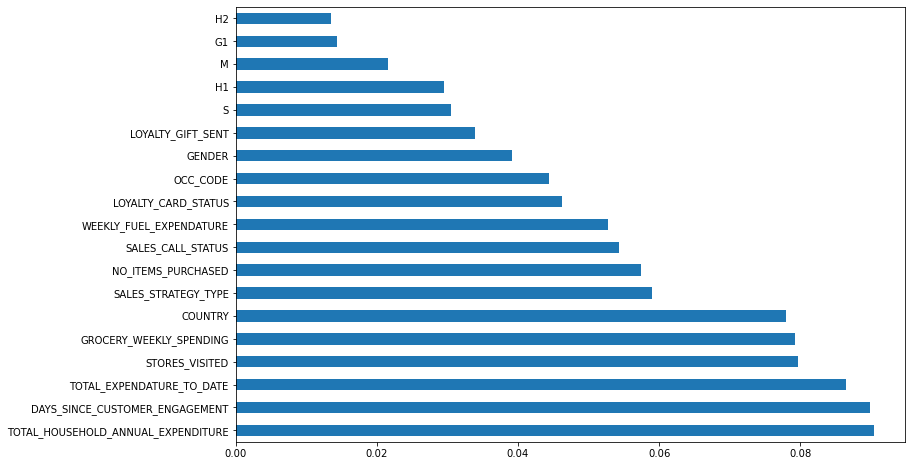

In [170]:

#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


# Using mutual information gain to see feature importance

In [159]:
from sklearn.feature_selection import mutual_info_classif

In [173]:
# determine the mutual information
mutual_info = mutual_info_classif(X,y)

In [174]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

LOYALTY_CARD_STATUS                   0.017270
OCC_CODE                              0.015598
M                                     0.007239
TOTAL_EXPENDATURE_TO_DATE             0.005111
SALES_STRATEGY_TYPE                   0.001764
DAYS_SINCE_CUSTOMER_ENGAGEMENT        0.001191
COUNTRY                               0.000589
H2                                    0.000000
TOTAL_HOUSEHOLD_ANNUAL_EXPENDITURE    0.000000
GROCERY_WEEKLY_SPENDING               0.000000
WEEKLY_FUEL_EXPENDATURE               0.000000
NO_ITEMS_PURCHASED                    0.000000
H1                                    0.000000
SALES_CALL_STATUS                     0.000000
STORES_VISITED                        0.000000
LOYALTY_GIFT_SENT                     0.000000
S                                     0.000000
G1                                    0.000000
GENDER                                0.000000
dtype: float64

<AxesSubplot:>

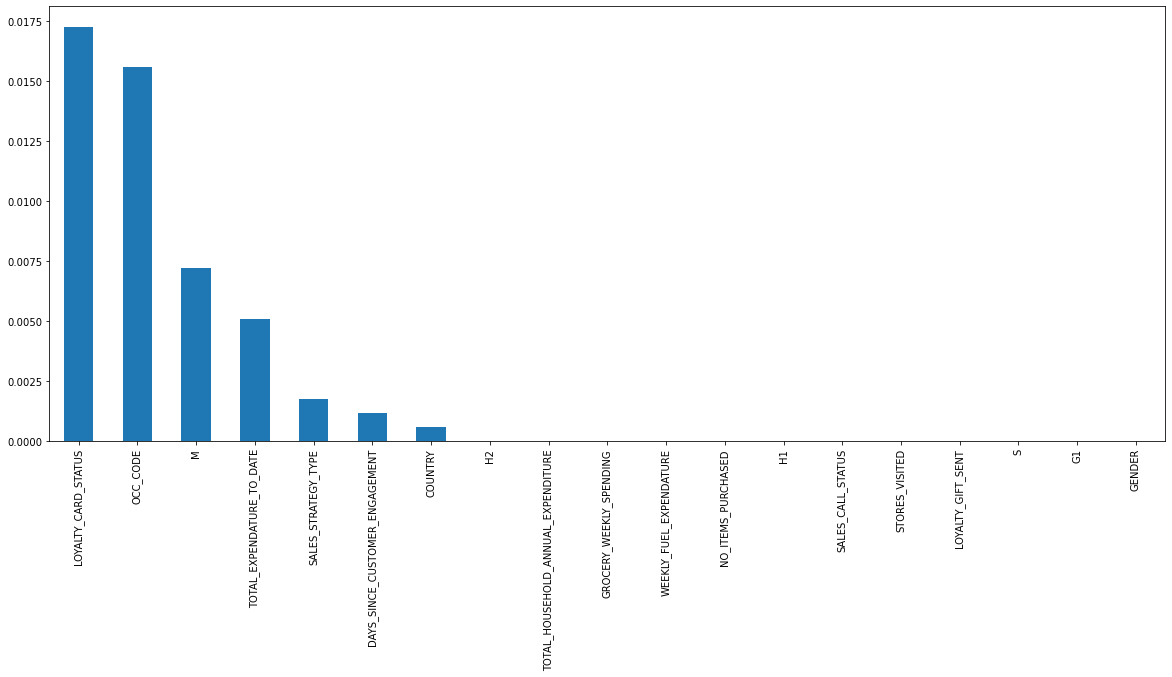

In [175]:


#let's plot the ordered mutual_info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))



# While running two feature selection techniques we find that annual household expenditure ,customer engagemnet (days) and loyalty card status tend to have significant effect 

# Here i choose not to eliminate any features  as some features tend to have max/moderate impact 

# Train test splitting the data

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Feature Scaling

# Standardizing data as most ML algorithms except random forest expects numerical columns to be normalized

In [186]:
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)
y_train = y_train.values
y_test = y_test.values

display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(700, 19)

(700, 1)

(300, 19)

(300, 1)

# Model Creation

In [191]:
#Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier

In [193]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

RandomForestClassifier()

<AxesSubplot:>

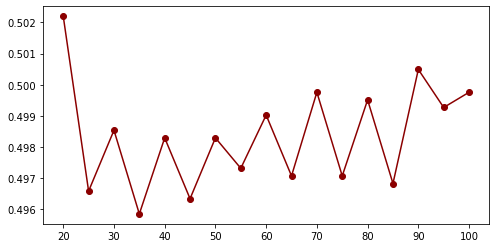

In [200]:
results = []
n_estimaor_options = [20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
for trees in n_estimaor_options:
    model = RandomForestClassifier(trees, oob_score=True, n_jobs=-1, random_state=101)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, n_estimaor_options).plot(color="darkred",marker="o")

<AxesSubplot:>

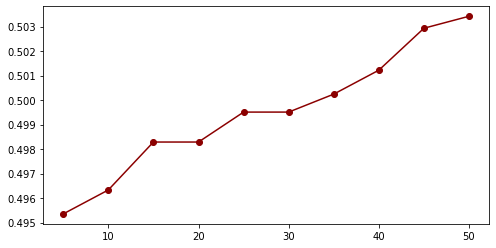

In [203]:
results = []
min_samples_leaf_options = [5,10,15,20,25,30,35,40,45,50]
for trees in min_samples_leaf_options:
    model = RandomForestClassifier(n_estimators=70, oob_score=True, n_jobs=-1, random_state=101, max_features = None, min_samples_leaf = trees)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, min_samples_leaf_options).plot(color="darkred",marker="o")



In [198]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [205]:


rfm = RandomForestClassifier(n_estimators=35, oob_score=True, n_jobs=-1, random_state=101, max_features = None, min_samples_leaf = 50)
rfm.fit(X_train, y_train)
y_pred=rfm.predict(X_test)



In [207]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[92, 69],
       [65, 74]])

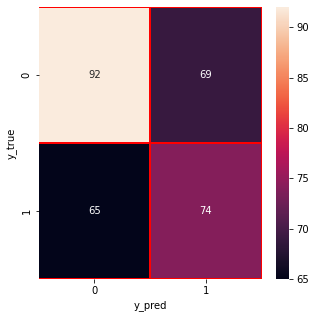

In [208]:
#confusion matrix visualization
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [211]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.57      0.58       161
           1       0.52      0.53      0.52       139

    accuracy                           0.55       300
   macro avg       0.55      0.55      0.55       300
weighted avg       0.55      0.55      0.55       300



# Cross Validation : to see if the accuracy of the model is really good

In [212]:
from sklearn.model_selection import StratifiedKFold
skfold=StratifiedKFold(n_splits=10)
model=RandomForestClassifier()
scores=cross_val_score(model,X,y,cv=skfold)
print(np.mean(scores))

0.524


# Hyperparameter tuning to improve the accuracy of the model

In [214]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
param = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(param)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


# Here i used Genetic Algorithms to improve Accuracy

In [216]:

pip install tpot

     |████████████████████████████████| 87 kB 3.1 MB/s             
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 139 kB 10.2 MB/s            
     |████████████████████████████████| 173.6 MB 9.5 kB/s            
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11956 sha256=d493e9e54b98e605f92bc6a1783aeeded7734d6283143c9946c5093e412e9378
  Stored in directory: /home/jovyan/.cache/pip/wheels/07/2e/ce/e558b7d4f9aafcdc0e5638ef890a3d5166d8a0f2c2dc768379
Successfully built stopit
Note: you may need to restart the kernel to use updated packages.


In [217]:

from tpot import TPOTClassifier


tpot_classifier = TPOTClassifier(generations= 5, population_size= 24, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,
                                 config_dict={'sklearn.ensemble.RandomForestClassifier': param}, 
                                 cv = 4, scoring = 'accuracy')
tpot_classifier.fit(X_train,y_train)



Optimization Progress:   0%|          | 0/84 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.5457142857142857

Generation 2 - Current best internal CV score: 0.5457142857142857

Generation 3 - Current best internal CV score: 0.5457142857142857

Generation 4 - Current best internal CV score: 0.5457142857142857

Generation 5 - Current best internal CV score: 0.5457142857142857

Best pipeline: RandomForestClassifier(input_matrix, criterion=entropy, max_depth=10, max_features=auto, min_samples_leaf=8, min_samples_split=2, n_estimators=800)


TPOTClassifier(config_dict={'sklearn.ensemble.RandomForestClassifier': {'criterion': ['entropy',
                                                                                      'gini'],
                                                                        'max_depth': [10,
                                                                                      120,
                                                                                      230,
                                                                                      340,
                                                                                      450,
                                                                                      560,
                                                                                      670,
                                                                                      780,
                                                                                 

# Optuna 

In [224]:
pip install optuna

     |████████████████████████████████| 308 kB 4.5 MB/s            
     |████████████████████████████████| 81 kB 15.9 MB/s            
     |████████████████████████████████| 112 kB 71.9 MB/s            
     |████████████████████████████████| 49 kB 10.8 MB/s            
     |████████████████████████████████| 147 kB 61.6 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=81874b5f3bc24378ddf092e279bb6bab879f731f1cfd5acde9acc7218e477832
  Stored in directory: /home/jovyan/.cache/pip/wheels/95/38/95/e30a7f0b44cb90642de3469f211a3218f93f871789b4f4b46c
Successfully built pyperclip
Note: you may need to restart the kernel to use updated packages.


In [225]:
import optuna
import sklearn.svm
def objective(trial):

    classifier = trial.suggest_categorical('classifier', ['RandomForest', 'SVC'])
    
    if classifier == 'RandomForest':
        n_estimators = trial.suggest_int('n_estimators', 200, 2000,10)
        max_depth = int(trial.suggest_float('max_depth', 10, 100, log=True))

        clf = sklearn.ensemble.RandomForestClassifier(
            n_estimators=n_estimators, max_depth=max_depth)
    else:
        c = trial.suggest_float('svc_c', 1e-10, 1e10, log=True)
        
        clf = sklearn.svm.SVC(C=c, gamma='auto')

    return sklearn.model_selection.cross_val_score(
        clf,X_train,y_train, n_jobs=-1, cv=3).mean()

In [226]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2022-08-14 15:40:26,289] A new study created in memory with name: no-name-2ea36a2f-4b8a-41fa-86e9-9949b4fbbcf7
[I 2022-08-14 15:40:26,394] Trial 0 finished with value: 0.4971204284509005 and parameters: {'classifier': 'SVC', 'svc_c': 13.904427018867894}. Best is trial 0 with value: 0.4971204284509005.
[I 2022-08-14 15:40:27,670] Trial 1 finished with value: 0.521361407627502 and parameters: {'classifier': 'RandomForest', 'n_estimators': 220, 'max_depth': 27.075054619763836}. Best is trial 1 with value: 0.521361407627502.
[I 2022-08-14 15:40:38,694] Trial 2 finished with value: 0.5299756673147231 and parameters: {'classifier': 'RandomForest', 'n_estimators': 1860, 'max_depth': 59.64393255938653}. Best is trial 2 with value: 0.5299756673147231.
[I 2022-08-14 15:40:38,789] Trial 3 finished with value: 0.4956898132863798 and parameters: {'classifier': 'SVC', 'svc_c': 12.670379905780925}. Best is trial 2 with value: 0.5299756673147231.
[I 2022-08-14 15:40:43,134] Trial 4 finished with va

Accuracy: 0.542796180135236
Best hyperparameters: {'classifier': 'RandomForest', 'n_estimators': 310, 'max_depth': 14.216299149739603}
